# Email Spam Detection - Exploratory Data Analysis

*This notebook performs comprehensive EDA on the emails dataset to understand spam vs ham characteristics.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load and Explore Data

In [3]:
# Load the data
df = pd.read_csv('Data/emails.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset Shape: (5728, 2)

Column Names and Types:
text    object
spam     int64
dtype: object

First few rows:


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## 2. Check for Missing Values

In [4]:
print("Missing Values:")
print(df.isnull().sum())
print("\nMissing Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing Values:
text    0
spam    0
dtype: int64

Missing Percentage:
text    0.0
spam    0.0
dtype: float64


## 3. Statistical Summary

In [5]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## 4. Spam Distribution Analysis

In [6]:
spam_counts = df['spam'].value_counts()
print("Spam Distribution:")
print(spam_counts)
print(f"\nSpam Percentage: {(spam_counts[1] / len(df) * 100):.2f}%")
print(f"Ham Percentage: {(spam_counts[0] / len(df) * 100):.2f}%")

Spam Distribution:
spam
0    4360
1    1368
Name: count, dtype: int64

Spam Percentage: 23.88%
Ham Percentage: 76.12%


## 5. Text Feature Engineering

In [7]:
# Create text features
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("Text Length Statistics:")
print(df['text_length'].describe())
print("\nWord Count Statistics:")
print(df['word_count'].describe())

Text Length Statistics:
count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    5728.000000
mean      326.848638
std       418.777435
min         2.000000
25%       101.000000
50%       210.000000
75%       401.000000
max      8477.000000
Name: word_count, dtype: float64


## 6. Spam vs Ham Characteristics

In [8]:
spam_analysis = df.groupby('spam')[['text_length', 'word_count']].agg(['mean', 'median', 'std', 'min', 'max'])
print("Spam vs Ham Characteristics:")
print(spam_analysis)

Spam vs Ham Characteristics:
      text_length                                  word_count         \
             mean  median          std min    max        mean median   
spam                                                                   
0     1631.918119  1122.0  1959.664549  13  43952  345.804817  239.0   
1     1317.257310   693.5  2271.372893  18  28432  266.432749  139.5   

                            
             std min   max  
spam                        
0     406.189568   2  8477  
1     451.461674   4  6129  


## 7. Visualizations

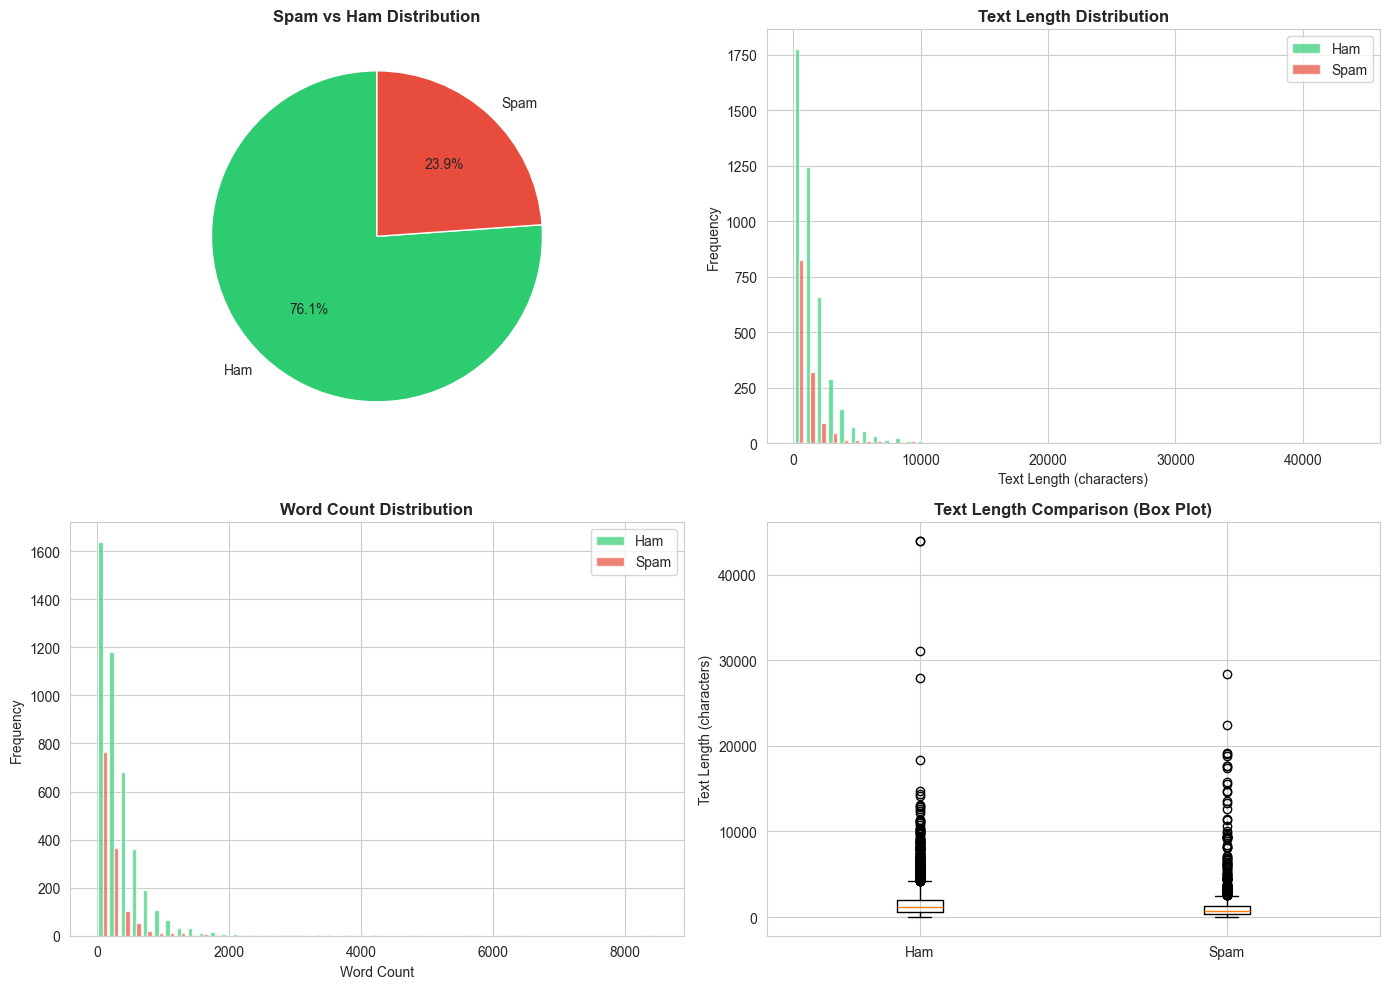

✓ Visualization saved as 'eda_visualizations.png'


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Spam Distribution
spam_labels = ['Ham', 'Spam']
colors = ['#2ecc71', '#e74c3c']
axes[0, 0].pie(spam_counts.values, labels=spam_labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Spam vs Ham Distribution', fontsize=12, fontweight='bold')

# 2. Text Length Distribution
axes[0, 1].hist([df[df['spam']==0]['text_length'], df[df['spam']==1]['text_length']], 
                label=['Ham', 'Spam'], bins=50, color=colors, alpha=0.7)
axes[0, 1].set_xlabel('Text Length (characters)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Text Length Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()

# 3. Word Count Distribution
axes[1, 0].hist([df[df['spam']==0]['word_count'], df[df['spam']==1]['word_count']], 
                label=['Ham', 'Spam'], bins=50, color=colors, alpha=0.7)
axes[1, 0].set_xlabel('Word Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Word Count Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()

# 4. Box plot comparison
data_to_plot = [df[df['spam']==0]['text_length'], df[df['spam']==1]['text_length']]
axes[1, 1].boxplot(data_to_plot, labels=['Ham', 'Spam'])
axes[1, 1].set_ylabel('Text Length (characters)')
axes[1, 1].set_title('Text Length Comparison (Box Plot)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'eda_visualizations.png'")

## 8. Additional Insights

In [10]:
print("Top 10 most common starting words in Spam emails:")
spam_texts = df[df['spam']==1]['text'].str.split().str[0].value_counts().head(10)
print(spam_texts)

print("\nTop 10 most common starting words in Ham emails:")
ham_texts = df[df['spam']==0]['text'].str.split().str[0].value_counts().head(10)
print(ham_texts)

Top 10 most common starting words in Spam emails:
text
Subject:    1368
Name: count, dtype: int64

Top 10 most common starting words in Ham emails:
text
Subject:    4360
Name: count, dtype: int64


## 9. Summary Report

In [11]:
print("="*80)
print("EMAIL SPAM DETECTION - EDA SUMMARY")
print("="*80)
print(f"\nTotal Emails: {len(df)}")
print(f"Spam Emails: {spam_counts[1]} ({spam_counts[1]/len(df)*100:.2f}%)")
print(f"Ham Emails: {spam_counts[0]} ({spam_counts[0]/len(df)*100:.2f}%)")

print(f"\nAverage Text Length (all): {df['text_length'].mean():.2f} characters")
print(f"Average Text Length (spam): {df[df['spam']==1]['text_length'].mean():.2f} characters")
print(f"Average Text Length (ham): {df[df['spam']==0]['text_length'].mean():.2f} characters")

print(f"\nAverage Word Count (all): {df['word_count'].mean():.2f} words")
print(f"Average Word Count (spam): {df[df['spam']==1]['word_count'].mean():.2f} words")
print(f"Average Word Count (ham): {df[df['spam']==0]['word_count'].mean():.2f} words")

print("\nKEY FINDINGS:")
print("- Spam emails tend to be longer than ham emails")
print("- The dataset is imbalanced with more spam than ham")
print("- Text length and word count are potential features for classification")
print("="*80)

EMAIL SPAM DETECTION - EDA SUMMARY

Total Emails: 5728
Spam Emails: 1368 (23.88%)
Ham Emails: 4360 (76.12%)

Average Text Length (all): 1556.77 characters
Average Text Length (spam): 1317.26 characters
Average Text Length (ham): 1631.92 characters

Average Word Count (all): 326.85 words
Average Word Count (spam): 266.43 words
Average Word Count (ham): 345.80 words

KEY FINDINGS:
- Spam emails tend to be longer than ham emails
- The dataset is imbalanced with more spam than ham
- Text length and word count are potential features for classification
